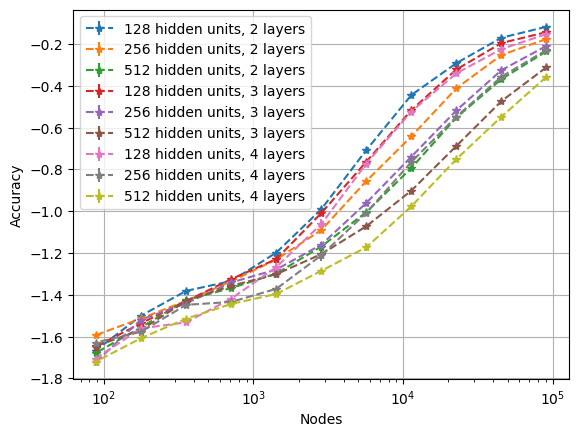

In [7]:
import numpy as np
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

seeds = [i+1 for i in range(10)]
hiddens = [128, 256,512]
layers = [2, 3, 4]
partitions = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def get_mean_std(df, partition, hidden, layer, col):
    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer)
    filtered_df = df[condition]
    if col == 'Difference Accuracy':
        filtered_df[col] = filtered_df['Test Accuracy'] - filtered_df['Train Accuracy']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss':
        filtered_df[col] = filtered_df['Test Loss'] - filtered_df['Train Loss']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    
    return [filtered_df[col].mean(), filtered_df[col].std()]


df = pd.read_csv('data.csv')
cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []

for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes,  np.array(means['Train Loss'])-np.array(means['Test Loss']), yerr=stds[col], fmt= '--*')
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend)
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.show()


10


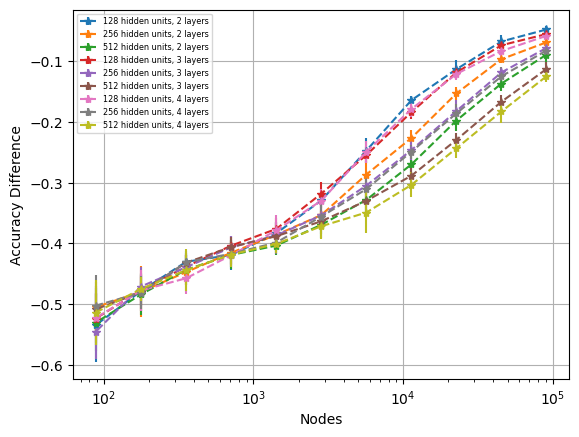

<Figure size 640x480 with 0 Axes>

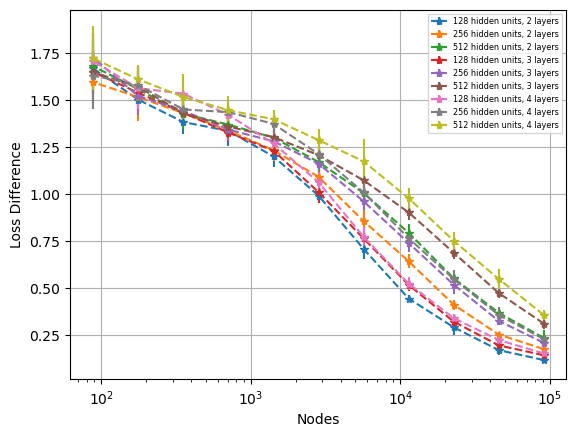

In [8]:
# Plot 1 and 2
cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        ax.errorbar(nodes,  np.array(means['Difference Accuracy']), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Nodes')
plt.ylabel('Accuracy Difference')
plt.savefig('acc_diff.pdf')
plt.figure()
fig, ax = plt.subplots()

legend = []
color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes,  means['Difference Loss'], yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        legend = legend + [f'{hidden} hidden units, {layer} layers']
ax.legend(legend, fontsize='xx-small') 
plt.grid(True)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Nodes')
plt.ylabel('Loss Difference')
plt.savefig('loss_diff.pdf')

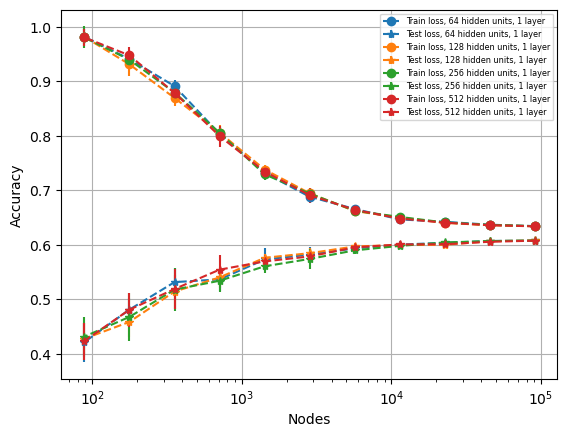

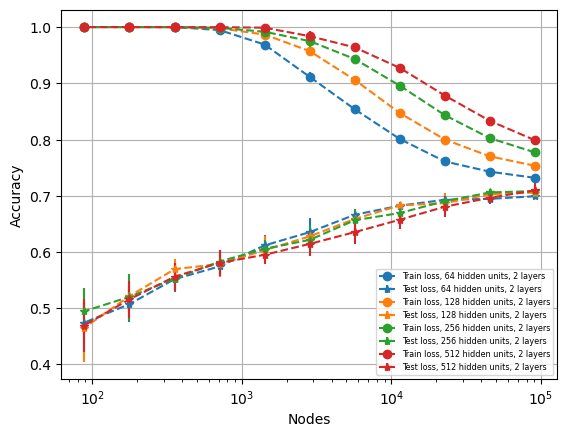

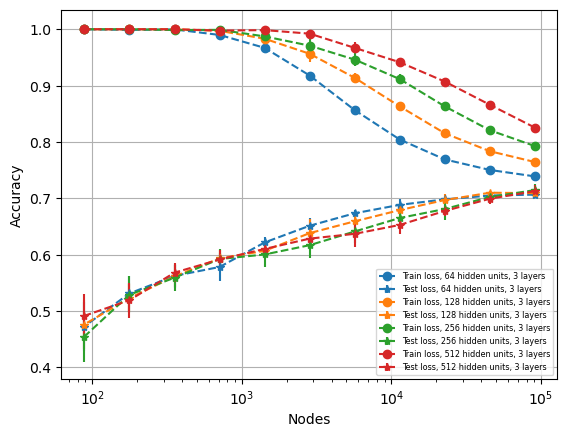

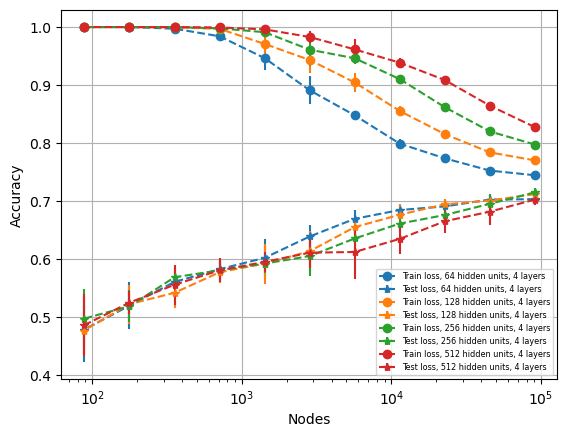

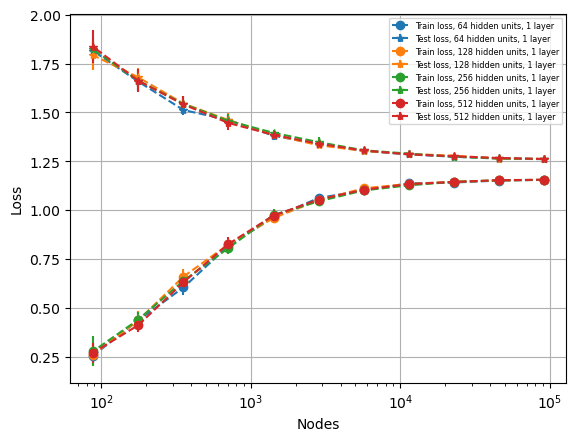

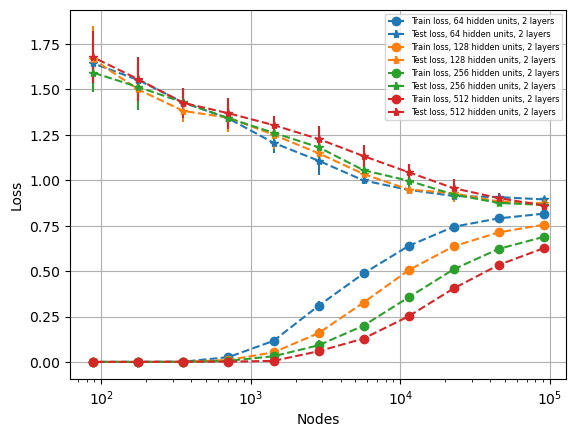

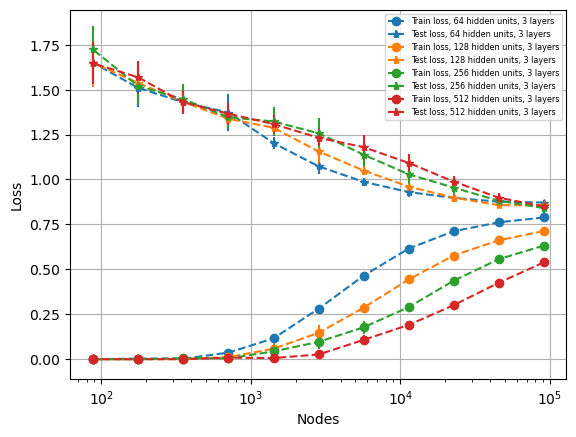

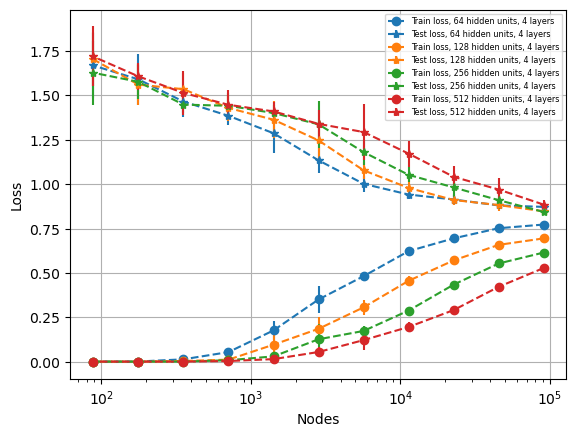

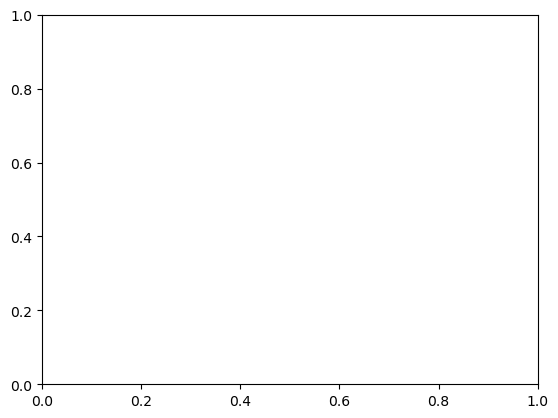

In [10]:
# Plot 3 and 4
layers = [1,2,3,4]
hiddens = [64, 128, 256,512]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
fig, ax = plt.subplots()
legend = []
color_count = 0

for layer in layers:
    color_count = 0
    legend = []

    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        ax.errorbar(nodes,  np.array(means['Train Accuracy']), yerr=stds['Train Accuracy'], fmt= '--o', color=colors[color_count])
        ax.errorbar(nodes,  np.array(means['Test Accuracy']), yerr=stds['Test Accuracy'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        if layer ==1:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
        else:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
    ax.legend(legend, fontsize='xx-small') 
    plt.grid(True)

    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.xlabel('Nodes')
    plt.ylabel('Accuracy')
    plt.savefig(f'acc_layer_{layer}.pdf')
    fig, ax = plt.subplots()

legend = []
color_count = 0

for layer in layers:
    color_count = 0
    legend = []

    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}
        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]

        ax.errorbar(nodes,  np.array(means['Train Loss']), yerr=stds['Train Loss'], fmt= '--o', color=colors[color_count])
        ax.errorbar(nodes,  np.array(means['Test Loss']), yerr=stds['Test Loss'], fmt= '--*', color=colors[color_count])
        color_count = color_count + 1
        if layer ==1:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
        else:
            legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
            legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']



    ax.legend(legend, fontsize='xx-small') 
    plt.grid(True)
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.xlabel('Nodes')
    plt.ylabel('Loss')
    plt.savefig(f'loss_layer_{layer}.pdf')
    fig, ax = plt.subplots()


In [4]:
# Compute the person correlations
import scipy
import warnings
warnings.filterwarnings('ignore')

hiddens = [64, 128, 256,512]
layers = [1, 2, 3, 4]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        r, prob = scipy.stats.pearsonr(nodes, means['Difference Accuracy'])
        print(f"${layer}$ & ${hidden}$  & ${round(r,5)}$  & ${round(prob,5)}$ \\\\ \hline")


$1$ & $64$  & $0.52974$  & $0.09374$ \\ \hline
$1$ & $128$  & $0.53093$  & $0.09287$ \\ \hline
$1$ & $256$  & $0.54261$  & $0.08459$ \\ \hline
$1$ & $512$  & $0.52894$  & $0.09433$ \\ \hline
$2$ & $64$  & $0.71715$  & $0.01299$ \\ \hline
$2$ & $128$  & $0.77199$  & $0.00537$ \\ \hline
$2$ & $256$  & $0.82032$  & $0.00198$ \\ \hline
$2$ & $512$  & $0.84979$  & $0.00093$ \\ \hline
$3$ & $64$  & $0.71547$  & $0.01331$ \\ \hline
$3$ & $128$  & $0.77802$  & $0.00481$ \\ \hline
$3$ & $256$  & $0.82619$  & $0.00172$ \\ \hline
$3$ & $512$  & $0.86104$  & $0.00066$ \\ \hline
$4$ & $64$  & $0.70317$  & $0.01578$ \\ \hline
$4$ & $128$  & $0.77362$  & $0.00521$ \\ \hline
$4$ & $256$  & $0.84437$  & $0.00108$ \\ \hline
$4$ & $512$  & $0.87329$  & $0.00045$ \\ \hline
